In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

import numpy as np
from numpy.core.numeric import NaN

from joblib import dump, load

from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers.legacy import Adam, SGD

import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [107]:
df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245).xlsx')

In [108]:
df

,ID,Quelles sont vos suggestions ou les raisons de vos insatisfactions ?,Catégorisation du verbatim :,Service d'hospitalisation,Date de réception du questionnaire,Eloge / Suggestion d'amélioration,Catégories Verbatims,Information et implication du patient,Respect du patient,Proches et aidants,Conditions hôtelières de la PEC - Confort / Calme,Conditions hôtelières de la PEC - Wifi / Télévision / Téléphone,Conditions hôtelières de la PEC - Repas,Parcours Patient - Coordination / Attente,Parking,Signalisation,Eloge
0,1,Douche pas pratique,Conditions hôtelières de la PEC - Repas;,1er chirurgie,2023-01-02,0,5,0,0,0,0,0,1,0,0,0,0
1,3,Une équipe qui a pris soins de moi. Merci à vo...,Eloge;,1er chirurgie,2023-01-09,1,9,0,0,0,0,0,0,0,0,0,1
2,14,Satisfait du personnel et du médecin. Je remer...,Eloge;,1er chirurgie,2023-01-09,1,9,0,0,0,0,0,0,0,0,0,1
3,24,Je suis handicapé depuis plusieurs années (tra...,Eloge;handicap;,2ème chirurgie ambulatoire,2023-01-12,1,9,0,0,0,0,0,0,0,0,0,1
4,25,"Aucune insatisfaction, merci pour tout.",Eloge;,2ème chirurgie ambulatoire,2023-01-12,1,9,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1235,Merci à l'ensemble du service. Je suis de nouv...,Eloge;,1er chirurgie,2023-12-18,1,9,0,0,0,0,0,0,0,0,0,1
347,1236,Tout est parfait.,Eloge;,1er chirurgie,2023-12-18,1,9,0,0,0,0,0,0,0,0,0,1
348,1238,"Douche, difficile de ne pas se mouiller partou...",Conditions hôtelières de la PEC - Confort / Ca...,1er chirurgie,2023-12-18,0,3,0,0,0,1,0,0,0,0,0,0
349,1241,"de l'essui main dans le WC, une bouteille d'ea...",Conditions hôtelières de la PEC - Confort / Ca...,1er chirurgie,2023-12-18,0,3,0,0,0,1,0,1,0,0,0,0


## Entrainement du modèle Eloge / Insatisfaction

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df['Quelles sont vos suggestions ou les raisons de vos insatisfactions ?'], 
                                                    df["Eloge / Suggestion d'amélioration"], 
                                                    test_size=0.3, 
                                                    stratify=df["Eloge / Suggestion d'amélioration"], 
                                                    random_state=7)

In [ ]:
#pip install tensorflow==2.1.0

In [4]:
encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

2023-12-26 12:35:43.754930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-26 12:35:43.755121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-26 12:35:43.777807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-26 12:35:43.777964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-26 12:35:43.778105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [6]:
with tf.device('/CPU:0'):
    emb = encoder(['Hello World'])

emb

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-2.60742642e-02, -8.46000165e-02, -2.67866217e-02,
         5.67842275e-02,  6.19704723e-02,  3.82260159e-02,
         2.01149341e-02,  2.74087600e-02,  8.69831964e-02,
         3.07917856e-02,  4.10411730e-02,  2.55183429e-02,
         9.65186744e-04,  5.89279719e-02,  4.00954112e-02,
         4.67089340e-02, -3.31279561e-02,  4.07041609e-02,
        -1.19929705e-02, -4.76170555e-02, -8.29668250e-03,
         7.05467463e-02,  4.84353630e-03,  8.09824839e-02,
        -5.70177287e-02, -6.43551499e-02,  6.97147325e-02,
        -6.98838457e-02,  2.64606178e-02, -2.35220529e-02,
         5.52375242e-02,  4.91363965e-02,  5.69897220e-02,
        -6.10719360e-02,  3.60850990e-02,  2.32446156e-02,
         5.60175255e-02, -1.09551996e-02,  4.21308316e-02,
        -1.76953934e-02,  7.12434668e-03,  2.04703063e-02,
        -7.10126385e-02, -8.45577493e-02,  4.36058566e-02,
         4.79397736e-02, -9.01802033e-02, -6.87343776e-02,
      

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=True))

In [9]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
## Autre manière de déclarer le modèle

"""x = tf.keras.layers.Input(shape=[], dtype=tf.string)
y = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                    trainable=True)(x)
z = tf.keras.layers.Dense(1, activation='sigmoid')(y)
model = tf.keras.models.Model(x, z)"""

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 256,798,337
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [12]:
with tf.device('/CPU:0'):
    history=model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
8/8 [==============================] - 3s 102ms/step - loss: 0.6511 - accuracy: 0.7061 - val_loss: 0.5777 - val_accuracy: 0.8679
Epoch 2/20
8/8 [==============================] - 1s 67ms/step - loss: 0.5242 - accuracy: 0.8857 - val_loss: 0.4742 - val_accuracy: 0.8962
Epoch 3/20
8/8 [==============================] - 1s 67ms/step - loss: 0.3998 - accuracy: 0.9265 - val_loss: 0.3905 - val_accuracy: 0.9245
Epoch 4/20
8/8 [==============================] - 1s 66ms/step - loss: 0.3001 - accuracy: 0.9510 - val_loss: 0.3314 - val_accuracy: 0.9245
Epoch 5/20
8/8 [==============================] - 1s 67ms/step - loss: 0.2218 - accuracy: 0.9837 - val_loss: 0.2919 - val_accuracy: 0.9245
Epoch 6/20
8/8 [==============================] - 1s 68ms/step - loss: 0.1667 - accuracy: 0.9959 - val_loss: 0.2683 - val_accuracy: 0.9151
Epoch 7/20
8/8 [==============================] - 1s 67ms/step - loss: 0.1303 - accuracy: 1.0000 - val_loss: 0.2502 - val_accuracy: 0.9245
Epoch 8/20
8/8 [==========

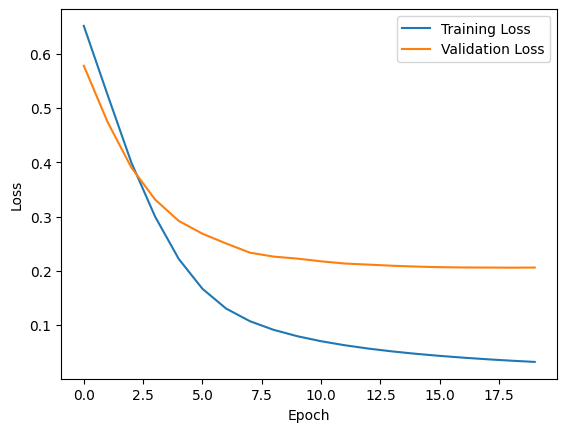

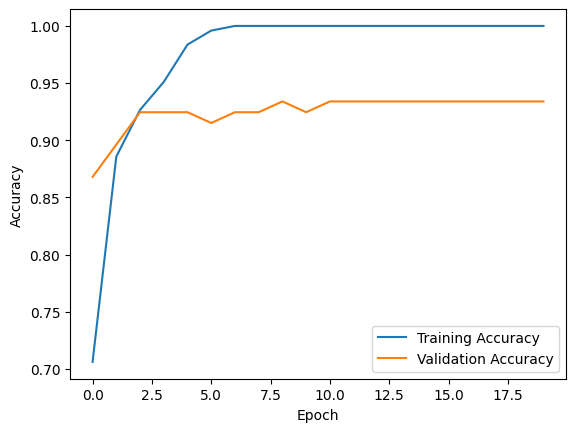

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
with tf.device('/CPU:0'):
    # Eloge
    eloge = model.predict(["Très bon accueil de tous le personnel et à l'écoute des patients"])
    print("Probabilité : " + str(eloge))
with tf.device('/CPU:0'):
    # Pas éloge
    peloge = model.predict(["pas assez de personnel de nuit ex.1personne et 1 stagiaire pour un étage. lever ) 5h45 pour aller au bloc à 8h, journée bien mais soins du soir à 23h45 ????"])
    print("Probabilité : " + str(peloge))

1/1 [==============================] - 0s 216ms/step
Probabilité : [[0.96990174]]
1/1 [==============================] - 0s 23ms/step
Probabilité : [[0.03429431]]


In [15]:
with tf.device('/CPU:0'):
    # Eloge
    eloge = model.predict(["très bonnes compétences du chirurgien et de oncologue toujours bienveillants et à l'écoute"])
    print("Probabilité : " + str(eloge))
with tf.device('/CPU:0'):
    # Pas éloge
    peloge = model.predict(["Chambre double, bruit, lumière, pas un séjour reposant !"])
    print("Probabilité : " + str(peloge))

1/1 [==============================] - 0s 30ms/step
Probabilité : [[0.96773934]]
1/1 [==============================] - 0s 22ms/step
Probabilité : [[0.03144525]]


In [16]:
with tf.device('/CPU:0'):
    loss, accuracy = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9340


In [17]:
model.metrics

In [251]:
X = df['Quelles sont vos suggestions ou les raisons de vos insatisfactions ?']
Y = df["Eloge / Suggestion d'amélioration"]

x_train, x_test, y_train, y_test = train_test_split(df['Quelles sont vos suggestions ou les raisons de vos insatisfactions ?'], 
                                                    df["Eloge / Suggestion d'amélioration"], 
                                                    test_size=0.3, 
                                                    stratify=df["Eloge / Suggestion d'amélioration"], 
                                                    random_state=7)

In [252]:
TP = 176
TN = 168
FP = 4
FN = 3
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("sensitivity = " + str(sensitivity))
print("specificity = " + str(specificity))

sensitivity = 0.9832402234636871
specificity = 0.9767441860465116


4/4 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9340
Mean accuracy score: [0.20593862235546112, 0.9339622855186462]
4/4 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9340


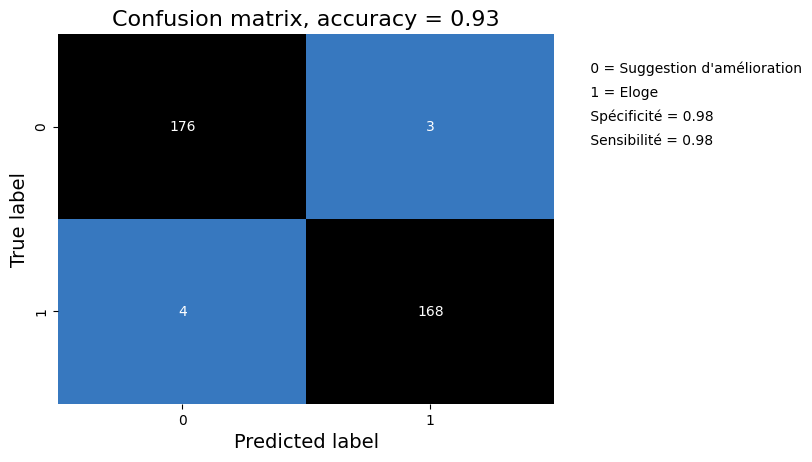

In [253]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

legend1 = " 0 = Suggestion d'amélioration"
legend2 = " 1 = Eloge"
legend3 = " Spécificité = " + str(round(specificity,2))
legend4 = " Sensibilité = " + str(round(sensitivity,2))

with tf.device('/CPU:0'):
    y_preds=model.predict([X])
    y_preds=np.where(y_preds > 0.5, 1,0)
    print('Mean accuracy score:',model.evaluate(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    
ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, accuracy = ' + str(round(accuracy,2)),fontsize=16);

plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)
plt.gcf().text(0.95,0.65, legend4)


plt.savefig("Matrice de confusion éloge - suggestion d'amélioration", dpi=400, bbox_inches="tight")
plt.show()

In [34]:
dump(model, 'Best_model_ElogeOrNot_26122023.joblib')

INFO:tensorflow:Assets written to: ram://0d472914-59e4-4e6e-b980-b71f6ddae42f/assets


INFO:tensorflow:Assets written to: ram://0d472914-59e4-4e6e-b980-b71f6ddae42f/assets


['Best_model_ElogeOrNot_26122023.joblib']

In [242]:
model = load('Best_model_ElogeOrNot_26122023.joblib')

## Entrainement du modèle catégorisation des verbatims

In [254]:
df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245).xlsx')

In [117]:
df

,ID,Quelles sont vos suggestions ou les raisons de vos insatisfactions ?,Catégorisation du verbatim :,Service d'hospitalisation,Date de réception du questionnaire,Eloge / Suggestion d'amélioration,Catégories Verbatims,Information et implication du patient,Respect du patient,Proches et aidants,Conditions hôtelières de la PEC - Confort / Calme,Conditions hôtelières de la PEC - Wifi / Télévision / Téléphone,Conditions hôtelières de la PEC - Repas,Parcours Patient - Coordination / Attente,Parking,Signalisation,Eloge
0,1,Douche pas pratique,Conditions hôtelières de la PEC - Repas;,1er chirurgie,2023-01-02,0,5,0,0,0,0,0,1,0,0,0,0
1,3,Une équipe qui a pris soins de moi. Merci à vo...,Eloge;,1er chirurgie,2023-01-09,1,9,0,0,0,0,0,0,0,0,0,1
2,14,Satisfait du personnel et du médecin. Je remer...,Eloge;,1er chirurgie,2023-01-09,1,9,0,0,0,0,0,0,0,0,0,1
3,24,Je suis handicapé depuis plusieurs années (tra...,Eloge;handicap;,2ème chirurgie ambulatoire,2023-01-12,1,9,0,0,0,0,0,0,0,0,0,1
4,25,"Aucune insatisfaction, merci pour tout.",Eloge;,2ème chirurgie ambulatoire,2023-01-12,1,9,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1235,Merci à l'ensemble du service. Je suis de nouv...,Eloge;,1er chirurgie,2023-12-18,1,9,0,0,0,0,0,0,0,0,0,1
347,1236,Tout est parfait.,Eloge;,1er chirurgie,2023-12-18,1,9,0,0,0,0,0,0,0,0,0,1
348,1238,"Douche, difficile de ne pas se mouiller partou...",Conditions hôtelières de la PEC - Confort / Ca...,1er chirurgie,2023-12-18,0,3,0,0,0,1,0,0,0,0,0,0
349,1241,"de l'essui main dans le WC, une bouteille d'ea...",Conditions hôtelières de la PEC - Confort / Ca...,1er chirurgie,2023-12-18,0,3,0,0,0,1,0,1,0,0,0,0


In [255]:
X_np   = np.array(df['Quelles sont vos suggestions ou les raisons de vos insatisfactions ?'])
Y = np.array(df["Catégories Verbatims"])

In [256]:
x_train, x_test, y_train, y_test = train_test_split(X_np, 
                                                    Y, 
                                                    test_size=0.3, 
                                                    stratify=df["Catégories Verbatims"], 
                                                    random_state=7)

In [257]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=10, dtype=y_train.dtype)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=10, dtype=y_train.dtype)#'float32'

In [151]:
y_train[0:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [152]:
x_train[0:10]

array(['Bon',
       "Merci à l'ensemble du service. Je suis de nouveau très satisfaite de la prise en charge de la douleur après la chirurgie. point fort.",
       'Le retour en chambre après la RT très long; Manque de brancardier',
       "j'habite deauville, j'ai 1h d'ambulance pour venir, personne n'en tient compte et j'ai des RDVs trop tôt comme hier pour pose de cathéter, arrivée à 8h prise en charge à 9h30",
       'Je suis anglais', 'Manque de places sur le parking',
       'Pour les personnes diabétiques pensez à mettre (en dessert) des aliments non sucrés',
       'Amélioration des repas', 'Amabilité / Souriant',
       "Attente chirurgien trop long long avant la sortie (12h à 16h) et pas d'informations, dommage. Pour le reste très bien"],
      dtype=object)

In [181]:
model = tf.keras.models.Sequential()

model.add(hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=True))

model.add(tf.keras.layers.Dense(2048, activation='relu'))

model.add(tf.keras.layers.Dense(1024, activation='relu'))

model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['AUC'])

earlystop = EarlyStopping(monitor='val_loss', patience=10)
#filepath = "./save_model/modelepochs:{epoch:03d}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min', period=1) #mode was 'auto' #monitor was loss
#path = "./save_logs/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_26 (KerasLayer)  (None, 512)              256797824 
                                                                 
 dense_85 (Dense)            (None, 2048)              1050624   
                                                                 
 dense_86 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_87 (Dense)            (None, 512)               524800    
                                                                 
 dense_88 (Dense)            (None, 10)                5130      
                                                                 
Total params: 260,476,554
Trainable params: 260,476,554
Non-trainable params: 0
_________________________________________________________________


In [188]:
with tf.device('/CPU:0'):
    history=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[earlystop])

Epoch 1/100
8/8 [==============================] - 3s 108ms/step - loss: 2.0955 - auc: 0.7515 - val_loss: 1.9072 - val_auc: 0.8435
Epoch 2/100
8/8 [==============================] - 1s 69ms/step - loss: 1.8488 - auc: 0.8502 - val_loss: 1.8028 - val_auc: 0.8521
Epoch 3/100
8/8 [==============================] - 1s 69ms/step - loss: 1.7363 - auc: 0.8722 - val_loss: 1.7015 - val_auc: 0.8701
Epoch 4/100
8/8 [==============================] - 1s 69ms/step - loss: 1.5857 - auc: 0.9088 - val_loss: 1.5919 - val_auc: 0.9038
Epoch 5/100
8/8 [==============================] - 1s 70ms/step - loss: 1.4199 - auc: 0.9501 - val_loss: 1.4848 - val_auc: 0.9274
Epoch 6/100
8/8 [==============================] - 1s 70ms/step - loss: 1.2496 - auc: 0.9754 - val_loss: 1.3874 - val_auc: 0.9380
Epoch 7/100
8/8 [==============================] - 1s 69ms/step - loss: 1.0881 - auc: 0.9899 - val_loss: 1.3015 - val_auc: 0.9443
Epoch 8/100
8/8 [==============================] - 1s 69ms/step - loss: 0.9393 - auc: 0.9

In [186]:
dump(model, 'Best_model_multiclass_26122023.joblib')

INFO:tensorflow:Assets written to: ram://09e82e28-a015-49e6-848b-77fdb9892585/assets


INFO:tensorflow:Assets written to: ram://09e82e28-a015-49e6-848b-77fdb9892585/assets


['Best_model_multiclass_26122023.joblib']

In [258]:
model = load('Best_model_multiclass_26122023.joblib')

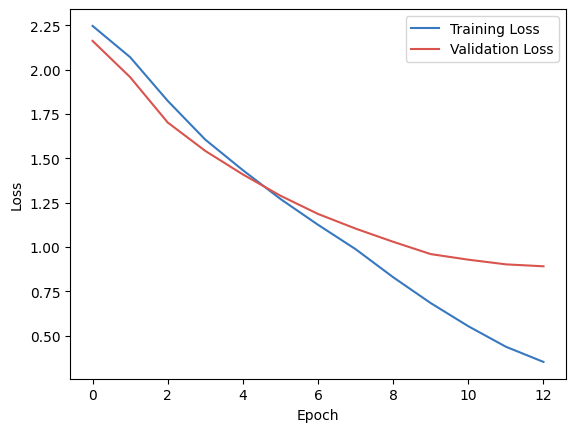

KeyError: 'accuracy'

In [183]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [190]:
with tf.device('/CPU:0'):
    # Eloge
    eloge = model.predict(["Très bon accueil de tous le personnel et à l'écoute des patients"])
    print("Probabilité : " + str(eloge))
with tf.device('/CPU:0'):
    # Pas éloge
    peloge = model.predict(["pas assez de personnel de nuit ex.1personne et 1 stagiaire pour un étage. lever ) 5h45 pour aller au bloc à 8h, journée bien mais soins du soir à 23h45 ????"])
    print("Probabilité : " + str(peloge))

1/1 [==============================] - 0s 201ms/step
Probabilité : [[0.00285023 0.00281362 0.00306864 0.0057609  0.00398603 0.00376583
  0.00443662 0.00441295 0.00244488 0.96646035]]
1/1 [==============================] - 0s 23ms/step
Probabilité : [[0.01467828 0.01548258 0.01340833 0.19916682 0.01125934 0.01208556
  0.6700268  0.03460876 0.01165074 0.0176328 ]]


In [193]:
with tf.device('/CPU:0'):
    # Eloge
    eloge = model.predict(["très bonnes compétences du chirurgien et de oncologue toujours bienveillants et à l'écoute"])
    print("Probabilité : " + str(eloge))
with tf.device('/CPU:0'):
    # Pas éloge
    peloge = model.predict(["Chambre double, bruit, lumière, pas un séjour reposant !"])
    print("Probabilité : " + str(peloge))

1/1 [==============================] - 0s 220ms/step
Probabilité : [[1.34250103e-02 2.92680901e-03 4.14205169e-05 2.76645616e-04
  1.88500737e-03 3.35207977e-03 3.45366588e-03 7.82142044e-04
  1.16127056e-04 9.73741174e-01]]
1/1 [==============================] - 0s 24ms/step
Probabilité : [[1.4788945e-03 4.1055452e-04 5.2800977e-05 9.8424387e-01 6.6642188e-03
  1.9901784e-03 4.2612106e-03 6.7701394e-04 1.1896909e-04 1.0235824e-04]]


In [185]:
with tf.device('/CPU:0'):
    # Eloge
    eloge = model.predict(["La promiscuité d une malade dans ma chambre qui a eu le covid .  Cette personne descendait fumer au rez de chaussée ce qui aurait peut être causer ce covid . Je demande à être dans chambre individuelle pour éviter que ça se reproduise       merci"])
    print("Probabilité : " + str(eloge))
with tf.device('/CPU:0'):
    # Pas éloge
    peloge = model.predict(["Un médecin de garde qui ne s'adressait pas à moi directement.  J'ai trouvé cela humiliant"])
    print("Probabilité : " + str(peloge))

1/1 [==============================] - 0s 24ms/step
Probabilité : [[2.1339327e-02 5.1464452e-03 3.1399506e-04 8.8673127e-01 3.2601610e-02
  1.0891970e-02 3.8187131e-02 2.5048021e-03 9.2895667e-04 1.3544499e-03]]
1/1 [==============================] - 0s 23ms/step
Probabilité : [[0.22801322 0.04118313 0.00095087 0.02513404 0.06044755 0.02646374
  0.15566061 0.01129486 0.00317056 0.44768137]]


In [162]:
with tf.device('/CPU:0'):
    # Eloge
    eloge = model.predict(["Le retour en chambre après la RT très long; Manque de brancardier"])
    print("Probabilité : " + str(eloge))
with tf.device('/CPU:0'):
    # Pas éloge
    peloge = model.predict(["Salle  de bain  trop petite  pour 2 personnes"])
    print("Probabilité : " + str(peloge))

1/1 [==============================] - 0s 30ms/step
Probabilité : [[4.1192012e-05 2.3999746e-05 4.6964126e-09 1.0502165e-05 2.1510790e-05
  1.5440862e-07 9.9989986e-01 3.3648968e-07 2.3240937e-06 3.5289567e-08]]
1/1 [==============================] - 0s 24ms/step
Probabilité : [[8.3586338e-10 1.1083777e-07 3.6972761e-10 9.9999762e-01 1.8950302e-06
  7.6861966e-08 1.0345448e-08 9.9202474e-08 1.6963993e-07 4.7599111e-09]]


4/4 [==============================] - 0s 6ms/step - loss: 0.8915 - auc: 0.9527
Mean AUC score: [0.8915061354637146, 0.9527115821838379]
4/4 [==============================] - 0s 6ms/step - loss: 0.8915 - auc: 0.9527


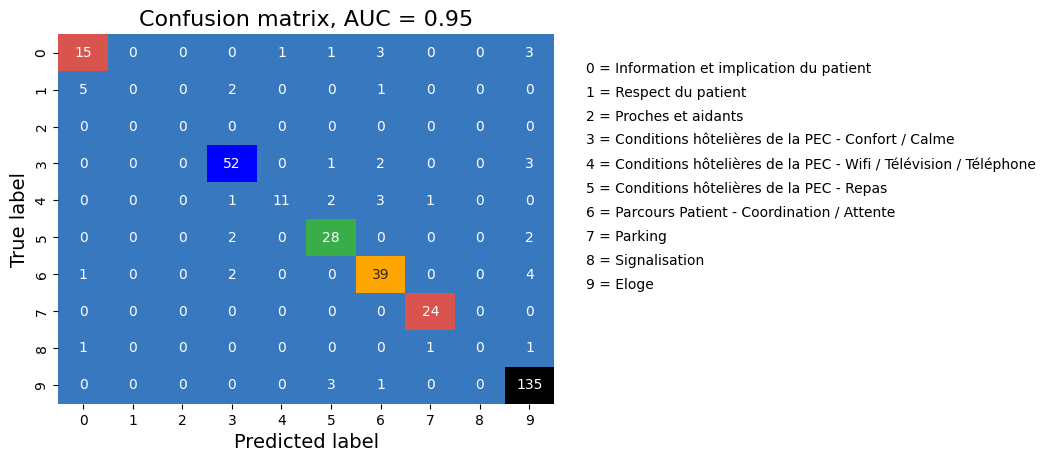

In [259]:
X = np.array(df['Quelles sont vos suggestions ou les raisons de vos insatisfactions ?'])
Y = np.array(df["Catégories Verbatims"])

legend1 = "0 = Information et implication du patient"
legend2 = "1 = Respect du patient"
legend3 = "2 = Proches et aidants"
legend4 = "3 = Conditions hôtelières de la PEC - Confort / Calme"
legend5 = "4 = Conditions hôtelières de la PEC - Wifi / Télévision / Téléphone"
legend6 = "5 = Conditions hôtelières de la PEC - Repas"
legend7 = "6 = Parcours Patient - Coordination / Attente"
legend8 = "7 = Parking"
legend9 = "8 = Signalisation"
legend10 = "9 = Eloge"

custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

results = []
with tf.device('/CPU:0'):
    y_preds=model.predict(X)
    for elm in y_preds:
        results.append(argmax(elm))
    y_preds = results
    print('Mean AUC score:',model.evaluate(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    
ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)
plt.gcf().text(0.95,0.65, legend4)
plt.gcf().text(0.95,0.6, legend5)
plt.gcf().text(0.95,0.55, legend6)
plt.gcf().text(0.95,0.5, legend7)
plt.gcf().text(0.95,0.45, legend8)
plt.gcf().text(0.95,0.40, legend9)
plt.gcf().text(0.95,0.35, legend10)
plt.savefig("Matrice de confusion multiclass verbatims", dpi=400, bbox_inches="tight")
plt.show()